COVID 19 Data Analysis

In [ ]:
Importing modules

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')
sns.set_style('whitegrid')

Importing dataset

In [43]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 683 entries, Province/State to 11/30/21
dtypes: float64(2), int64(679), object(2)
memory usage: 1.5+ MB


Deleting useless columns

In [45]:
df.drop(['Province/State', 'Lat', 'Long'],axis=1,inplace=True)

In [12]:
df.head(20)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
1,Albania,0,0,0,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
2,Algeria,0,0,0,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
3,Andorra,0,0,0,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
4,Angola,0,0,0,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,4135,4136,4138,4138,4141,4141,4141,4141,4141,4141
6,Argentina,0,0,0,0,0,0,0,0,0,...,5315348,5315989,5317633,5319867,5322127,5324039,5325560,5326448,5328416,5330748
7,Armenia,0,0,0,0,0,0,0,0,0,...,334075,334347,334878,335738,336330,337005,337522,337931,338120,338518
8,Australia,0,0,0,0,0,0,0,0,0,...,2053,2072,2087,2095,2103,2110,2117,2124,2130,2134
9,Australia,0,0,0,0,3,4,4,4,4,...,79997,80163,80408,80681,80938,81170,81355,81499,81674,81916


Aggregate Country rows

In [46]:
df = df.groupby('Country/Region').sum()
df.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
Albania,0,0,0,0,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
Algeria,0,0,0,0,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
Andorra,0,0,0,0,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
Angola,0,0,0,0,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,4135,4136,4138,4138,4141,4141,4141,4141,4141,4141
Argentina,0,0,0,0,0,0,0,0,0,0,...,5315348,5315989,5317633,5319867,5322127,5324039,5325560,5326448,5328416,5330748
Armenia,0,0,0,0,0,0,0,0,0,0,...,334075,334347,334878,335738,336330,337005,337522,337931,338120,338518
Australia,0,0,0,0,4,5,5,6,9,9,...,199649,200651,202115,203642,205269,206749,207984,209139,210238,211655


In [51]:
df.columns = pd.to_datetime(df.columns)

In [52]:
df.columns

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', length=679, freq=None)

Exploratory Visualizations

<AxesSubplot:>

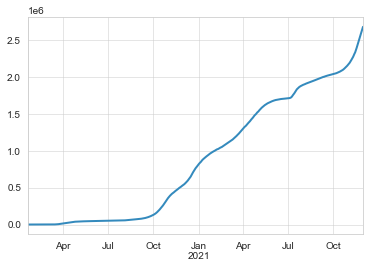

In [17]:
df.loc['Netherlands'].plot()

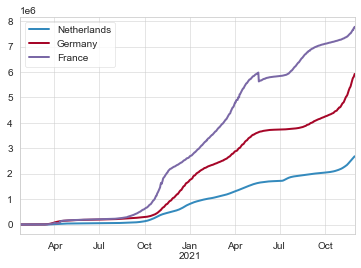

In [18]:
df.loc['Netherlands'].plot()
df.loc['Germany'].plot()
df.loc['France'].plot()
plt.legend()

Finding maximum infection rates through change in infection

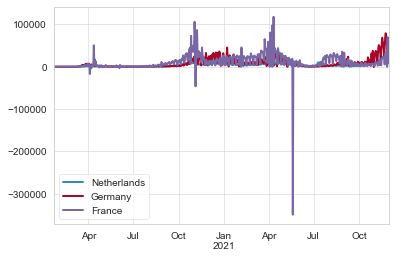

In [19]:
df.loc['Netherlands'].diff().plot()
df.loc['Germany'].diff().plot()
df.loc['France'].diff().plot()
plt.legend()

France is has an interesting outlier - explore further

In [20]:
df.loc['Netherlands'].diff().max()
#biggest change in infection rate over a 24h period was: 23783

23783.0

In [21]:
df.loc['Germany'].diff().max()
#biggest change in infection rate over a 24h period was: 79051

79051.0

In [22]:
df.loc['France'].diff().max()
#biggest change in infection rate over a 24h period was: 117902

117902.0

Find maximum infection rate for all countries

In [23]:
df['max infection rate'] = df.apply(lambda x: x.diff().max(), axis=1)

In [53]:
df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
Albania,0,0,0,0,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
Algeria,0,0,0,0,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
Andorra,0,0,0,0,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
Angola,0,0,0,0,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168


New dataframe with infection rate

In [25]:
df_COV = pd.DataFrame(df['max infection rate'])
df_COV.head()

,max infection rate
Country/Region,
Afghanistan,3243.0
Albania,1239.0
Algeria,1927.0
Andorra,403.0
Angola,1493.0


Import second data set to compare

In [26]:
df_vac = pd.read_csv('vaccinations.csv')
df_vac.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [27]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64968 entries, 0 to 64967
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             64968 non-null  object 
 1   iso_code                             64968 non-null  object 
 2   date                                 64968 non-null  object 
 3   total_vaccinations                   36666 non-null  float64
 4   people_vaccinated                    35084 non-null  float64
 5   people_fully_vaccinated              32118 non-null  float64
 6   total_boosters                       8018 non-null   float64
 7   daily_vaccinations_raw               30679 non-null  float64
 8   daily_vaccinations                   64624 non-null  float64
 9   total_vaccinations_per_hundred       36666 non-null  float64
 10  people_vaccinated_per_hundred        35084 non-null  float64
 11  people_fully_vaccinated_per_

In [28]:
df_vac = df_vac[['location', 'date', 'daily_people_vaccinated']]
df_vac

,location,date,daily_people_vaccinated
0,Afghanistan,2021-02-22,NaN
1,Afghanistan,2021-02-23,1367.0
2,Afghanistan,2021-02-24,1367.0
3,Afghanistan,2021-02-25,1367.0
4,Afghanistan,2021-02-26,1367.0
...,...,...,...
64963,Zimbabwe,2021-11-25,22152.0
64964,Zimbabwe,2021-11-26,18876.0
64965,Zimbabwe,2021-11-27,16225.0
64966,Zimbabwe,2021-11-28,14125.0


In [29]:
df_vac = df_vac.pivot(index='location', columns='date', values='daily_people_vaccinated')

Changing dates

In [30]:
df_vac.columns = pd.to_datetime(df_vac.columns)

In [54]:
df_vac.columns

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='date', length=364, freq=None)

In [55]:
df.columns

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', length=679, freq=None)

In [ ]:
rows same name

In [67]:
pd.merge(df,df_vac,how='inner',on='Country/Region')

KeyError: 'Country/Region'

In [62]:
#Inner join
data = df.join(df_vac,how = 'inner', lsuffix='L', rsuffix='R')
data.head()

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2021-11-20 00:00:00R,2021-11-21 00:00:00R,2021-11-22 00:00:00R,2021-11-23 00:00:00R,2021-11-24 00:00:00R,2021-11-25 00:00:00R,2021-11-26 00:00:00R,2021-11-27 00:00:00R,2021-11-28 00:00:00R,2021-11-29 00:00:00R
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,116472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0,0,0,0,0,0,0,0,0,0,...,1794.0,1729.0,1751.0,1773.0,1773.0,1726.0,1719.0,1713.0,1706.0,NaN
Algeria,0,0,0,0,0,0,0,0,0,0,...,31361.0,31361.0,27753.0,23734.0,19716.0,15698.0,11680.0,NaN,NaN,NaN
Andorra,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,0,0,0,0,0,0,0,0,0,0,...,33659.0,39943.0,42673.0,45402.0,48132.0,NaN,NaN,NaN,NaN,NaN


In [64]:
print(df.columns)
print(df_vac.columns)
print(data.columns)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', length=679, freq=None)
DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='date', length=364, freq=None)
Index([   2020-01-22 00:00:00,    2020-01-23 00:00:00,    2020-01-24 00:00:00,
      